In [1]:
import pickle
import pandas as pd
import seaborn as sns

# Carregando dados

In [2]:
PATH = "/home/kenzosaki/mestrado/data/tweetsentbr/tweetsentbr.pickle"

In [3]:
pkl_data = pickle.load(open(PATH, "rb"))

In [4]:
data_df = pd.DataFrame.from_dict(
    {
        "text": [data[0] for data in pkl_data],
        "label": [data[1] for data in pkl_data]
    }
)

In [5]:
data_df.head(3)

,text,label
0,Só isso de Vivianne Pasmanter Ana Maria? A vai...,-1
1,Mr. CATRA @OficialMrCatra lançando sua nova mú...,1
2,Todos deviam ver esse vídeo do Nabby Clifford....,1


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12312 entries, 0 to 12311
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12312 non-null  object
 1   label   12312 non-null  object
dtypes: object(2)
memory usage: 192.5+ KB


# Processando os labels

In [7]:
label2text = {
    "-1": "negativo",
    "0": "neutro",
    "1": "positivo"
}

In [8]:
data_df["label"] = data_df["label"].replace(label2text)

In [9]:
data_df["label"].value_counts()

positivo    5542
negativo    3634
neutro      3136
Name: label, dtype: int64

In [10]:
data_df.to_csv("/home/kenzosaki/mestrado/data/tweetsentbr/tweetsentbr.csv")

# Análise de número de exemplos por classe

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12312 entries, 0 to 12311
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12312 non-null  object
 1   label   12312 non-null  object
dtypes: object(2)
memory usage: 192.5+ KB


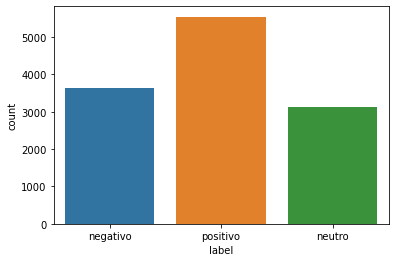

In [15]:
sns.countplot(data=data_df, x="label")

# Número de tokens por tweet

Número de tokenz *WordPiece* (utilizado pelo modelo BERT) por tweet. Analisar a quantidade de tokens é interessante pois permite determinar um tamanho máximo de sequência que se minimize perda de informações. 


In [16]:
from transformers import BertTokenizerFast

In [17]:
model = "neuralmind/bert-base-portuguese-cased"
tokenizer = BertTokenizerFast.from_pretrained(model)

In [18]:
def get_num_tokens(text: str) -> int:
  return len(tokenizer.encode(text))

In [19]:
%%time
data_df["tweet_tokens"] = data_df["text"].map(get_num_tokens)

CPU times: user 1.01 s, sys: 0 ns, total: 1.01 s
Wall time: 1.01 s


In [26]:
# Estatísticas descritivas
data_df["tweet_tokens"].describe()

count    12312.000000
mean        25.820663
std         10.311752
min          6.000000
25%         18.000000
50%         24.000000
75%         32.000000
max         97.000000
Name: tweet_tokens, dtype: float64

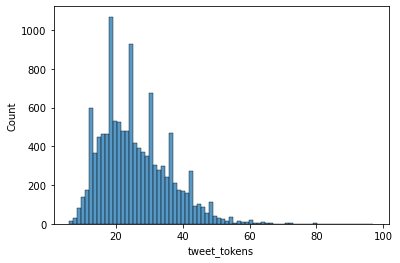

In [23]:
# Histograma para os valores
sns.histplot(data=data_df, x="tweet_tokens")

In [27]:
min_tokens = data_df["tweet_tokens"].argmin()
max_tokens = data_df["tweet_tokens"].argmax()

In [28]:
# Exemplos com min/max tokens
data_df.iloc[[min_tokens, max_tokens]]

,text,label,tweet_tokens
8255,#encontro to ligada,neutro,6
1467,Puta Palmito cagão kkkkkkkkkkkkk kkkkkkkkkkkkk...,negativo,97
